# Getting Started

Ripple is made to be an object oriented way to play around with strong gravitational lensing. It is not optimized for speed or detailed science tasks, it is however very easy to use and a good reference point to test ideas with. The code is generalized and so a number of configurations are possible. 

To begin with let's explain the structure of the code. In any lensing system there is at least one observer, lens, and source which are represented as an ```ImagePlane```, ```LensPlane```, and ```SourcePlane``` object respectively. In each lens plane there can be any number of lens objects (for example ```SIE_Lens```, ```PointMass_Lens```, and ```Gaussian_Lens```), these would all lie on the sample plane at a given redshift. Similarly, a source plane may have any number of source objects in it which add together (for example ```Gaussian_Source```, ```Exponential_Source```, and ```Image_Source```). Before we get into too much detail, lets see it in action. Below we will first import the relevant objects.

In [9]:
%matplotlib notebook
import sys
sys.path.append("../")
from ripple.lens import SIE_Lens, SIS_Lens, Null_Lens
from ripple.source import Gaussian_Source
from ripple.plane import ImagePlane
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["image.cmap"] = "inferno"
import numpy as np

## Our first lens

Now lets try to lens an object. We will use an ```SIE_Lens``` to lens a basic ```Gaussian_Source``` with all of them aligned on the main axis. To do this we simply pass the image plane object our initialized SIE and Gaussian objects.

<IPython.core.display.Javascript object>


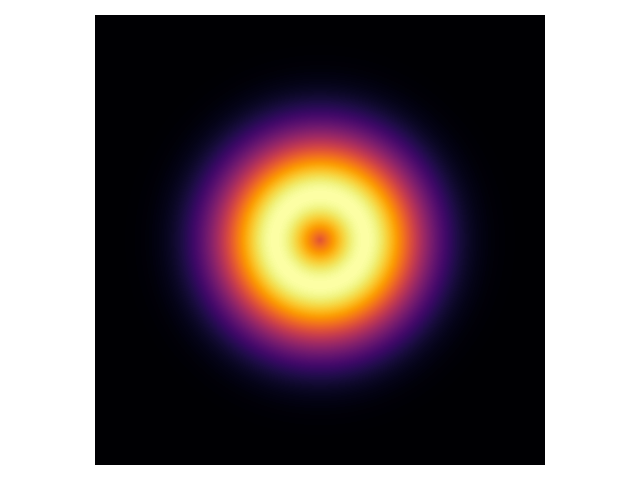

In [2]:
SIE = SIS_Lens()
GS = Gaussian_Source()
IP = ImagePlane(shape = (1000,1000), fov = 10)

fig, ax = plt.subplots()
ax.imshow(IP.image(SIE, GS), extent = IP.plt_extent, origin = "lower")
ax.axis("off")
plt.tight_layout()
plt.show()

### Model parameters

Now that we have made a lens system, lets try and play with its parameters. Most lenses can be shifted, tilted, squished, etc by controlling ```x0, y0, q,``` and ```pa``` which are the horizontal translation, vertical translation, axis ratio, and position angle respectively. There may also be special parameters such as ```core``` for an SIE or the ```sigma``` of a Gaussian. Feel free to mess around with the parameters.

<IPython.core.display.Javascript object>


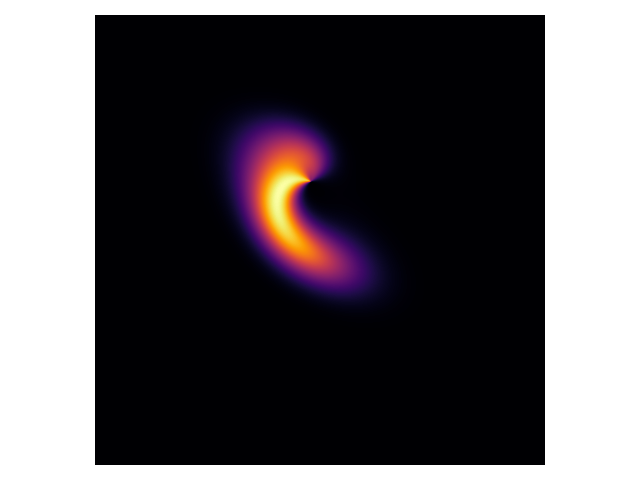

In [23]:
SIE2 = SIE_Lens(x0 = -0.2, y0 = 1.3, q = 0.99, pa = -np.pi/4, core = 0.2)
GS2 = Gaussian_Source(x0 = -0.1, y0 = 0.7, q = 0.5, pa = -np.pi/3, sigma = 0.4, norm = 0.1)

fig, ax = plt.subplots()
ax.imshow(IP.image(SIE2, GS2), extent = IP.plt_extent, origin = "lower")
ax.axis("off")
plt.tight_layout()
plt.show()

### Multiple sources

Next lets try adding a second gaussian blob to our source plane. To have multiple sources, we will need to actually make a ```SourcePlane``` object so that we can give it both sources.

<IPython.core.display.Javascript object>


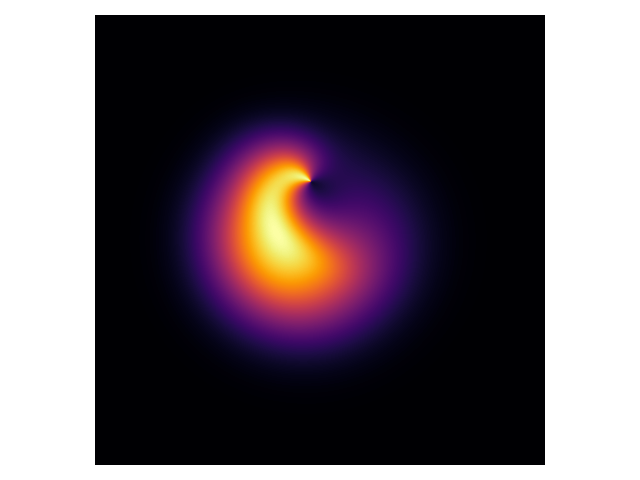

In [4]:
from ripple.plane import SourcePlane

SP = SourcePlane([GS, GS2])

fig, ax = plt.subplots()
ax.imshow(IP.image(SIE2, SP), extent = IP.plt_extent, origin = "lower")
ax.axis("off")
plt.tight_layout()
plt.show()

### Multiple lenses

Next lets add another lens to the lens plane. Like before, we now need to actually make a ```LensPlane``` object and add both lenses to it.

<IPython.core.display.Javascript object>


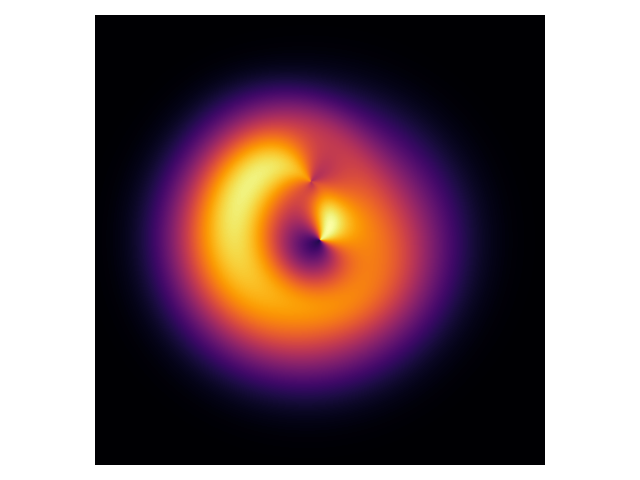

In [5]:
from ripple.plane import LensPlane

LP = LensPlane([SIE, SIE2])

fig, ax = plt.subplots()
ax.imshow(IP.image(LP, SP), extent = IP.plt_extent, origin = "lower")
ax.axis("off")
plt.tight_layout()
plt.show()

### Multiple lens planes

Now we have seen putting two lenses in the same plane, what happens if we separate the planes in redshift? Lets use the same two lenses from before, but now we will separate everything in redshift. The image plane is at z = 0 by default and the source plane is at z = 2 by default, lets put the lens planes at z = 0.5 and 1 to see what happens. Interestingly, we will get a different image from when the two lenses were in the same plane, this is because now the light has some time to travel for a while after the deflections from the first lens before it encounters the deflections from the second lens.

<IPython.core.display.Javascript object>


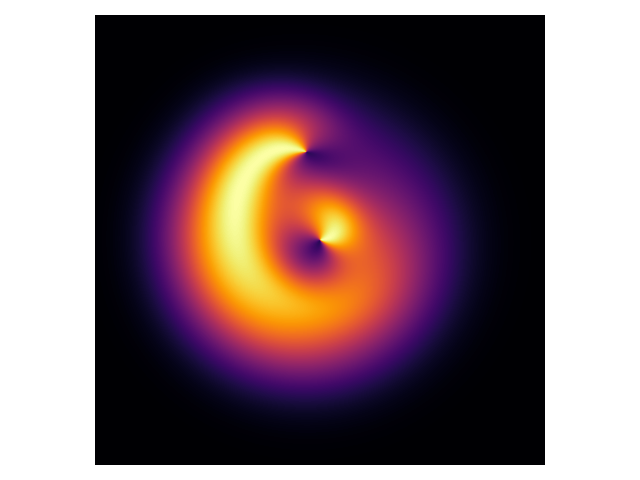

In [14]:
from ripple.plane import MultiLensPlane

LP1 = LensPlane([SIE], z = 0.5)
LP2 = LensPlane([SIE2], z = 1.)
MLP = MultiLensPlane([LP1, LP2])

fig, ax = plt.subplots()
ax.imshow(IP.image(MLP, SP), extent = IP.plt_extent, origin = "lower")
ax.axis("off")
plt.tight_layout()
plt.show()

### Having fun with Einstein

A number of lens and source types exist in ripple. The most general are the image types in which a 2D array can be given with any values and all the lensing equiations will be solved on an interpolated version of these images. For example, lets download an image of Einstein and put it in the source plane. Using the multiplane lens from before we will get quite the striking image!

<IPython.core.display.Javascript object>


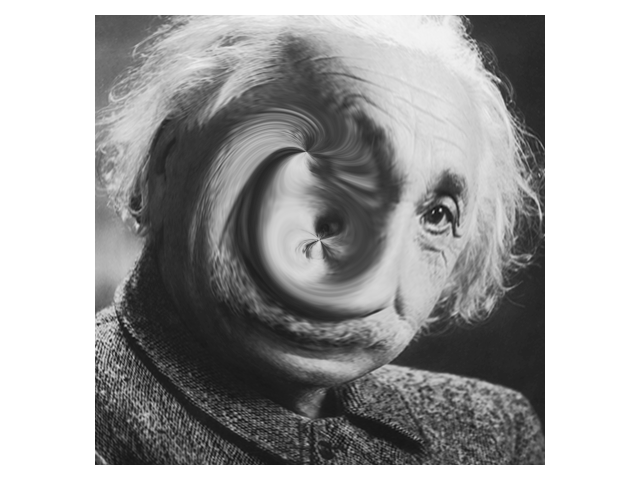

In [15]:
from ripple.source import Image_Source
import skimage

Einstein = np.flip(skimage.io.imread("https://www.biography.com/.image/MTc5ODc5NjY5ODU0NjQzMzIy/gettyimages-3091504.jpg").T,axis = 1)
ES = Image_Source(Einstein, pixelscale = 0.02)

fig, ax = plt.subplots()
ax.imshow(IP.image(MLP, ES), extent = IP.plt_extent, origin = "lower", cmap = "gray")
ax.axis("off")
plt.tight_layout()
plt.show()

To see just how much the lens is doing, lets look at the Einstein image through a ```Null_Lens``` which has no deflection field and so will show us the image as if no lensing had occurred (a ```Null_Source``` also exists, but it's less useful). We could have just plotted the Einstein image directly, but this way we will see it scaled properly in the same units as were used above.

<IPython.core.display.Javascript object>


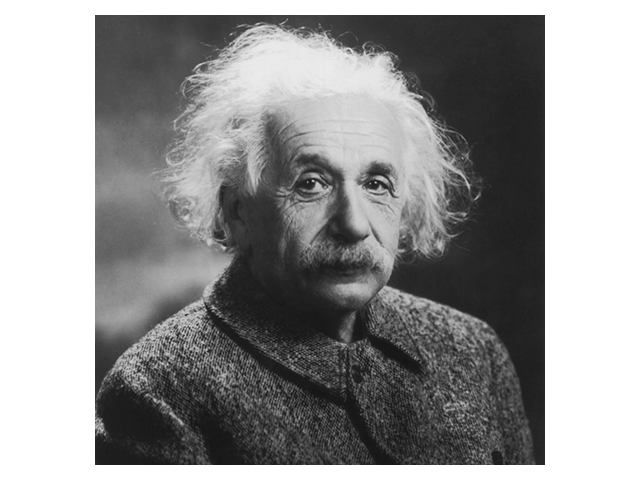

In [8]:
from ripple.lens import Null_Lens
NL = Null_Lens()

fig, ax = plt.subplots()
ax.imshow(IP.image(NL, ES), extent = IP.plt_extent, origin = "lower", cmap = "gray")
ax.axis("off")
plt.tight_layout()
plt.show()